In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Machine Steps
# 1. Exploratory Data Analysis 
# 2. Data Cleaning 
# 3. Feature Engineering 
# 4. Model selection
# 5. Model training 


df = pd.read_csv("FIFA 2018 Statistics.csv")


In [2]:
df.head(5)
# 1st Goal - NaN probably indicates that no goal was scored by that player
# Own goals - maybe drop?
# own goal time - maybe drop

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


C:\Users\jorda\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6216A8198>,
      dtype=object)

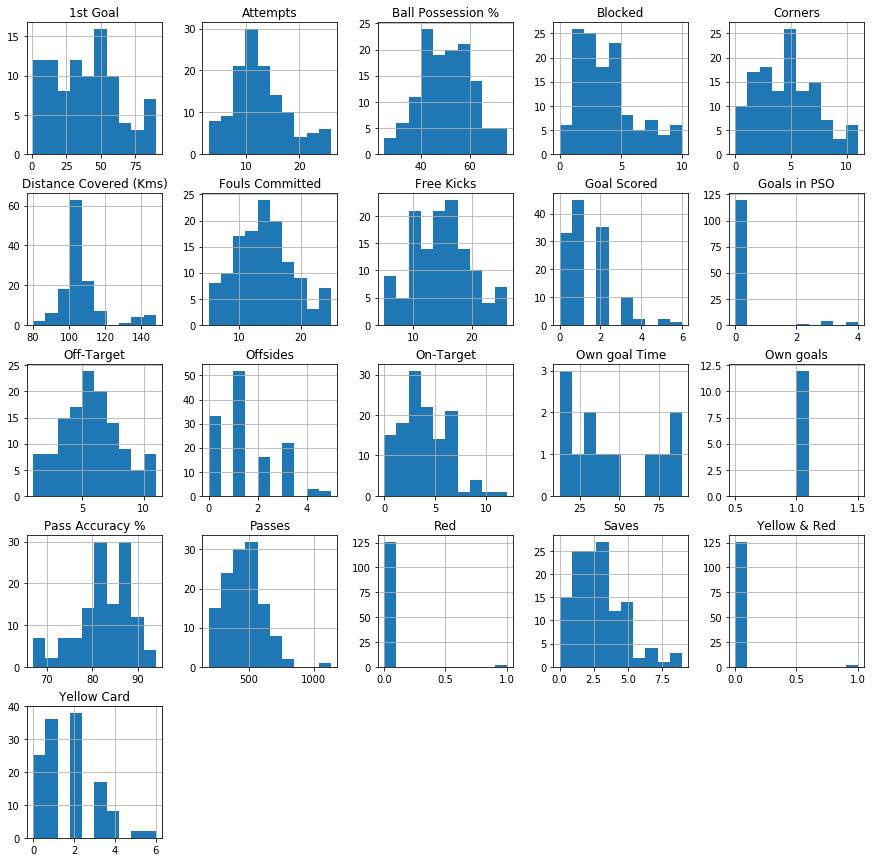

In [9]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
df.hist(ax=ax)

In [35]:
# Data cleaning for categorical data 
samp = pd.Series(["facebook", "Google", "Facebook", "Youtube", "YouTube", "You tube"])
#samp.value_counts()
samp.apply(lambda x: x.lower().replace(" ", "")).value_counts()


youtube     3
facebook    2
google      1
dtype: int64

In [12]:
# Data Cleaning
new_df = df.drop(columns="Yellow & Red")
new_df.head(1)

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Fouls Committed,Yellow Card,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,22,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN


In [16]:
new_df["Own goals"].fillna(0, inplace = True)
# Feature Engineering - Transforming data into a more useful form for analysis
# In this case we wanted an indictor variable for Own Goal Time being NaN
new_df["Own goals bool"] = new_df["Own goal Time"].isna()
new_df["Own goal Time"].fillna(0, inplace = True)

In [33]:
# Model Selection
# Supervised - Predict whether a player is the Man of The Match -  true or false 
# So this is a classification problem 
# Classification algorithms 
# K Nearest neigbors - Take each data point and store it and for a new prediction
# you assign a class to a new set of features based on how close they are to other data points


new_df["1st Goal"].fillna(0, inplace = True)
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
df_scaled = preprocessing.scale(new_df.select_dtypes(include=[np.number]))
# For every sklearn class there are 3 key functions
# .fit() -> fits model to your data
# .transform() -> transforms your data (only applies to certain  classes)
# .predict() -> predicts classes or regression based on fitted model 
#               (only applies to predictors/ML models)


# We scale data so 0-140 (e.g.Distance Travelled) data points don't
# throw off distance vs 0-7 data points (e.g. Yellow Card)
scale = StandardScaler()
scaled = scale.fit_transform(new_df.select_dtypes(include=[np.number]))
print(new_df.select_dtypes(include=[np.number]).keys())
# preparing to use KNearestNeighbors




Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Red', '1st Goal', 'Goals in PSO',
       'Own goals', 'Own goal Time'],
      dtype='object')


In [62]:
from sklearn.neighbors import KNeighborsClassifier

# K (or n_neighbors) is what's known as a hyperparameter beacause the best value cannot be
# learned from your data
clf = KNeighborsClassifier(n_neighbors= 10)


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

training_features, testing_features, training_target, testing_target = \
train_test_split(scaled, new_df["Man of the Match"], test_size = .2, random_state= 43)

# Fit the classifier to our training data
clf.fit(training_features, training_target)

# Predict class labels for testing data
class_pred = clf.predict(testing_features)

# Scores how good our model predictions were compared to the target values
clf.score(testing_features, testing_target)

0.6153846153846154

In [63]:
from sklearn.linear_model import SGDClassifier

# In this example we use linear classification to predict the same target
clf = SGDClassifier()


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

training_features, testing_features, training_target, testing_target = \
train_test_split(scaled, new_df["Man of the Match"], test_size = .2, random_state= 43)

# Fit the classifier to our training data
clf.fit(training_features, training_target)

# Predict class labels for testing data
class_pred = clf.predict(testing_features)

# Scores how good our model predictions were compared to the target values
clf.score(testing_features, testing_target)

C:\Users\jorda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.7692307692307693

In [68]:
motm_df = new_df.copy() 
motm_df["Man of the Match"] = motm_df["Man of the Match"].apply(lambda x: 1 if x=="Yes" else 0)
motm_df

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time,Own goals bool
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,1,12.0,Group Stage,No,0,0.0,0.0,True
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,0.0,Group Stage,No,0,0.0,0.0,True
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,0.0,Group Stage,No,0,0.0,0.0,True
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,1,89.0,Group Stage,No,0,0.0,0.0,True
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,0.0,Group Stage,No,0,1.0,90.0,False
5,15-06-2018,Iran,Morocco,1,36,8,2,5,1,2,...,3,0,1,90.0,Group Stage,No,0,0.0,0.0,True
6,15-06-2018,Portugal,Spain,3,39,8,3,2,3,4,...,1,0,0,4.0,Group Stage,No,0,0.0,0.0,True
7,15-06-2018,Spain,Portugal,3,61,12,5,5,2,5,...,1,0,1,24.0,Group Stage,No,0,0.0,0.0,True
8,16-06-2018,France,Australia,2,51,12,5,4,3,5,...,1,0,0,58.0,Group Stage,No,0,0.0,0.0,True
9,16-06-2018,Australia,France,1,49,4,1,2,1,1,...,3,0,1,62.0,Group Stage,No,0,1.0,81.0,False


In [79]:
motm_df.corr()["Man of the Match"].sort_values()


Red                      -0.125988
Yellow Card              -0.124265
Fouls Committed          -0.118859
Own goals                -0.053606
Own goal Time            -0.040062
Blocked                  -0.032637
Saves                    -0.011481
Distance Covered (Kms)    0.026034
Offsides                  0.026288
Goals in PSO              0.038873
Own goals bool            0.053606
Passes                    0.091668
Pass Accuracy %           0.104421
Ball Possession %         0.107389
Free Kicks                0.109573
Off-Target                0.139960
Corners                   0.147497
Attempts                  0.152503
On-Target                 0.263265
1st Goal                  0.348437
Goal Scored               0.508629
Man of the Match          1.000000
Name: Man of the Match, dtype: float64

In [83]:
motm_scaled = preprocessing.scale(motm_df.select_dtypes(include=[np.number])[["Goal Scored", "1st Goal", "On-Target"]])

from sklearn.linear_model import SGDClassifier

# K (or n_neighbors) is what's known as a hyperparameter beacause the best value cannot be
# learned from your data
clf = SGDClassifier()


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

training_features, testing_features, training_target, testing_target = \
train_test_split(motm_scaled, motm_df["Man of the Match"], test_size = .2, random_state= 43)

# Fit the classifier to our training data
clf.fit(training_features, training_target)

# Predict class labels for testing data
class_pred = clf.predict(testing_features)

# Scores how good our model predictions were compared to the target values
clf.score(testing_features, testing_target)

C:\Users\jorda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.7692307692307693

In [85]:
motm_df.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Red,Man of the Match,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,...,462.648438,106.664062,13.546875,1.695312,0.015625,0.500000,28.976562,0.203125,0.093750,4.296875
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,...,151.186311,11.749537,4.619131,1.325454,0.124507,0.501965,27.304196,0.807049,0.292626,16.053728
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,...,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,...,462.000000,104.500000,13.000000,2.000000,0.000000,0.500000,23.500000,0.000000,0.000000,0.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,...,555.250000,109.000000,16.000000,2.000000,0.000000,1.000000,51.000000,0.000000,0.000000,0.000000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,...,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.000000,90.000000
